In [2]:
import pandas as pd

from cifar10_tools import plot_models_optimizers


In [7]:
df = pd.read_csv("./mnist_experiments_results2_.csv")
df = df.rename(columns={"test_acc": "Test Accuracy"})
df = df.rename(columns={"train_acc": "Train Accuracy"})
df = df.rename(columns={"train_loss": "Train loss"})
df = df.rename(columns={"test_loss": "Test loss"})
df = df.rename(columns={"epoch_time": "Epoch time"})

display(df.head())


,model_name,optimizer_name,epoch,Train loss,Train Accuracy,Test loss,Test Accuracy,epoch_train_time,epoch_test_time
0,Classic,Adam,1,0.067873,74.668333,27794.605748,71.12,12.235939,13.790690
1,Classic,Adam,2,0.018219,87.093333,44210.936973,81.72,11.525141,13.057607
2,Classic,Adam,3,0.005732,90.466667,5023.134868,90.84,11.783892,13.264440
3,Classic,Adam,4,0.005013,91.316667,2981.899662,91.41,11.734122,13.295612
4,Classic,Adam,5,0.004536,92.003333,25941.245987,93.23,11.843236,13.374611


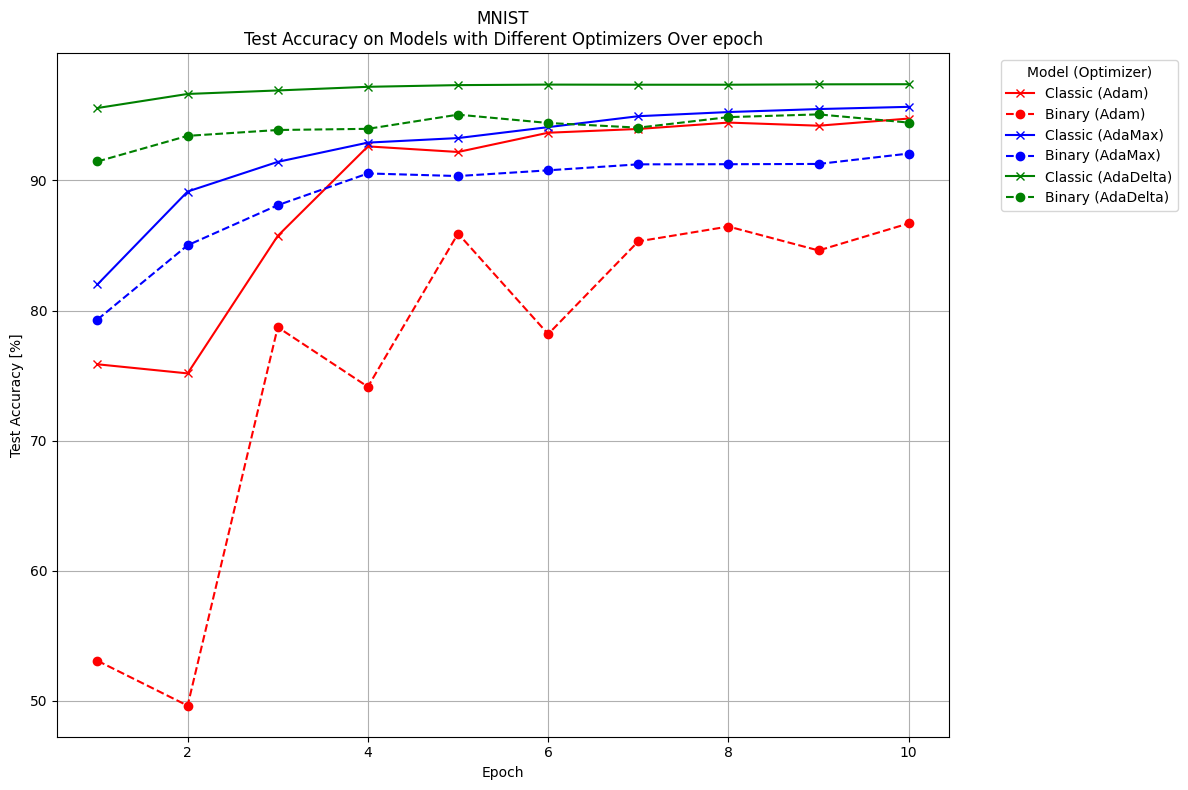

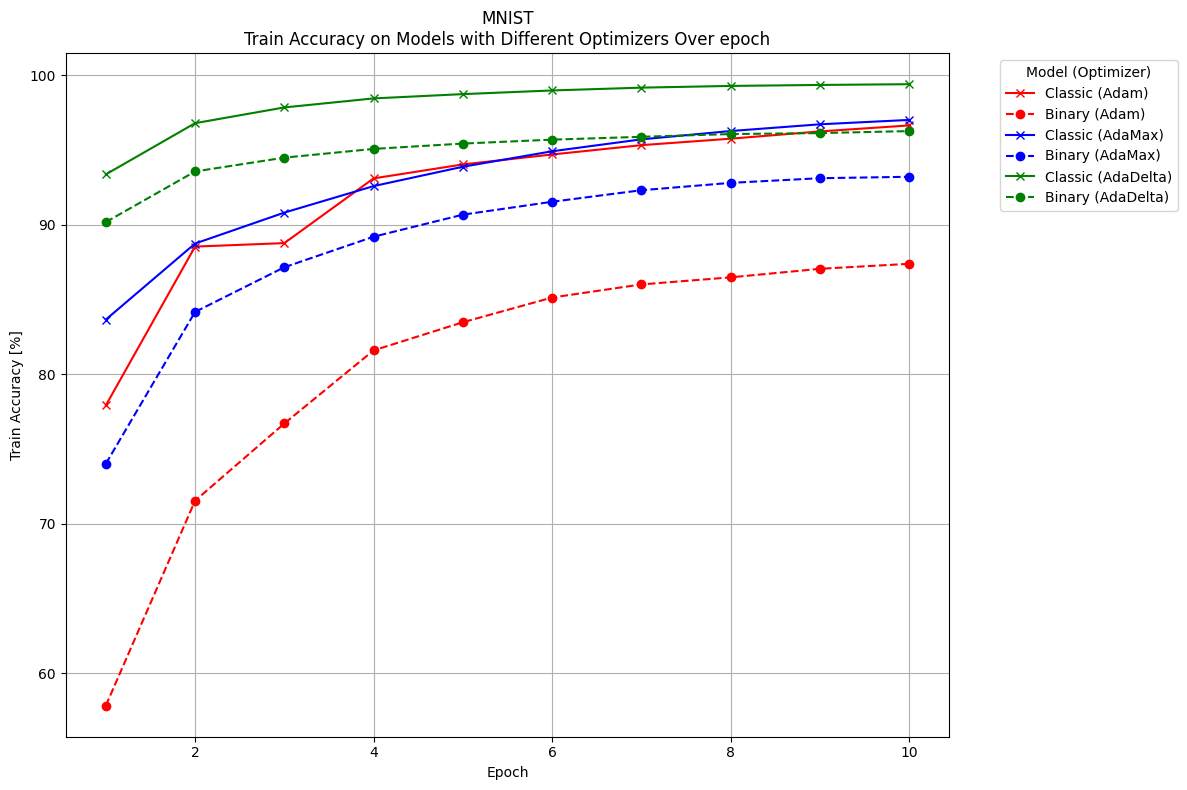

In [5]:
plot_models_optimizers(df, "MNIST", "epoch", "Test Accuracy", y_unit="[%]")
plot_models_optimizers(df, "MNIST", "epoch", "Train Accuracy", y_unit="[%]")


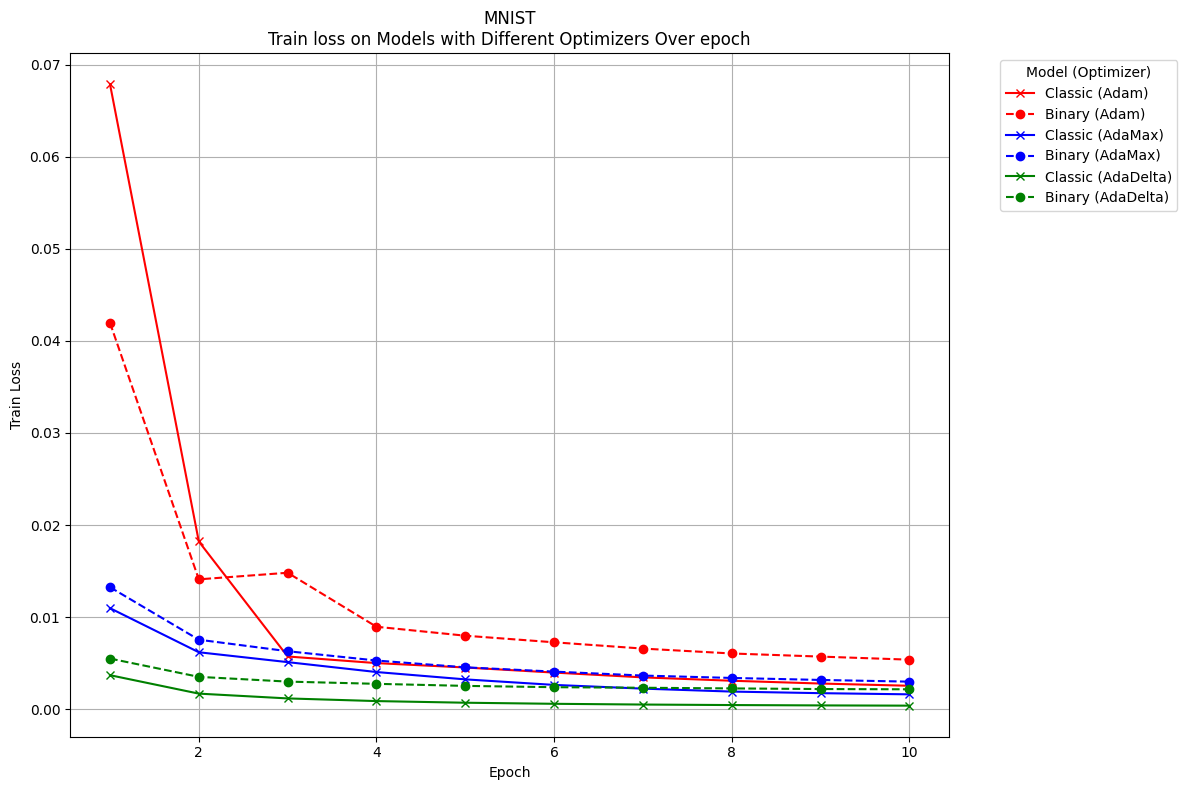

In [8]:
plot_models_optimizers(df, "MNIST", "epoch", "Train loss")

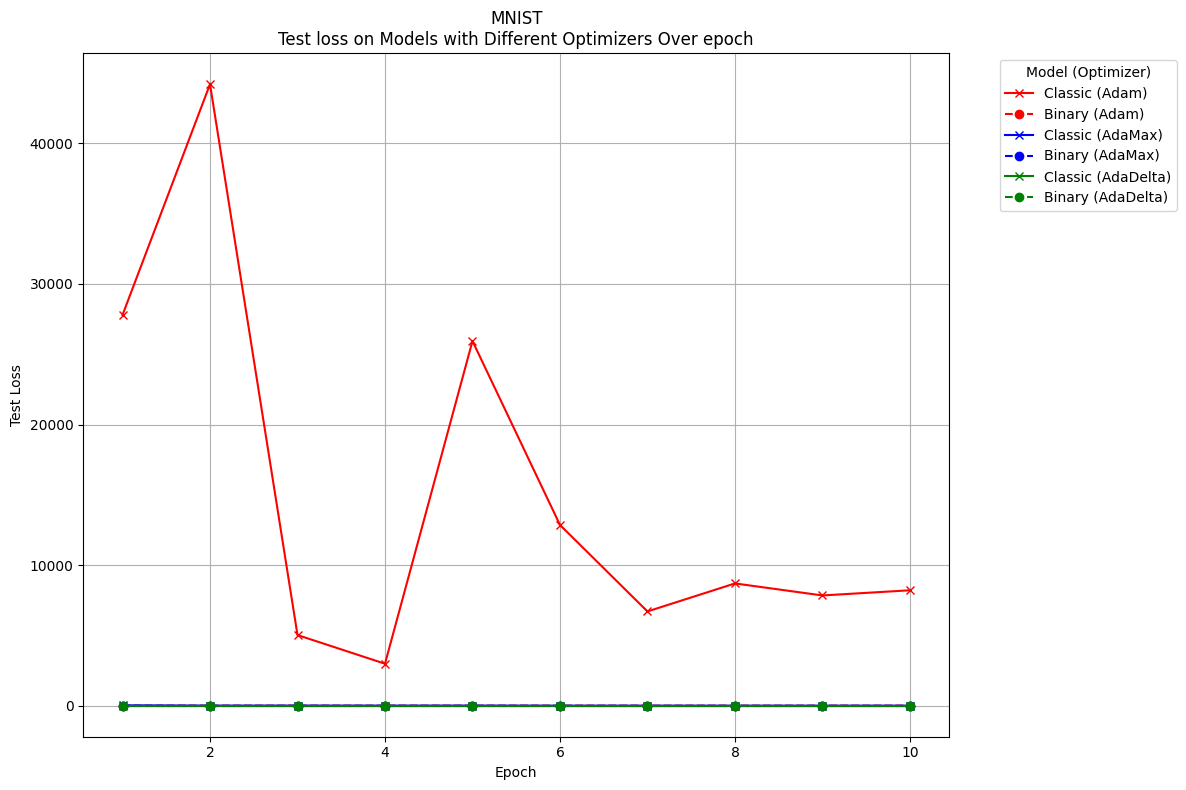

In [10]:
plot_models_optimizers(df, "MNIST", "epoch", "Test loss")

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

time_df = pd.read_csv('./log/mnist_times.txt')

In [2]:
time_df

,model,opitmizer,time
0,bimlp,adadelta,50.70
1,bimlp,adam,47.97
2,bimlp,adamax,49.16
3,mlp,adadelta,47.66
4,mlp,adam,46.99
5,mlp,adamax,49.04


(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

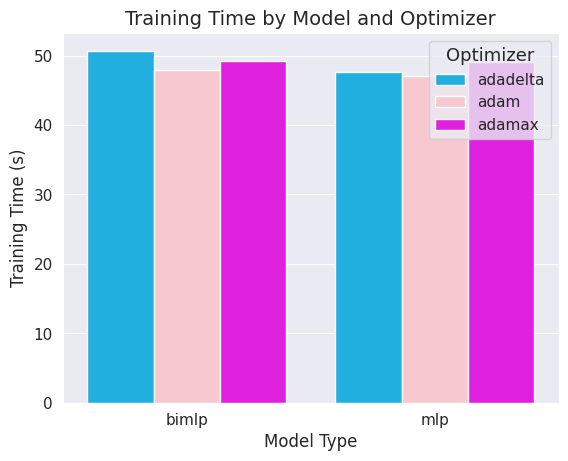

In [14]:
palette = {
    'adamax': 'fuchsia',
    'adadelta': 'deepskyblue',
    'adam': 'pink'
    
}

sns.barplot(time_df, x='model', y='time', hue='opitmizer', palette=palette)
# Add labels and title
plt.xlabel("Model Type", fontsize=12)
plt.ylabel("Training Time (s)", fontsize=12)
plt.title("Training Time by Model and Optimizer", fontsize=14)
plt.legend(title='Optimizer', title_fontsize='13', fontsize='11')
plt.grid
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

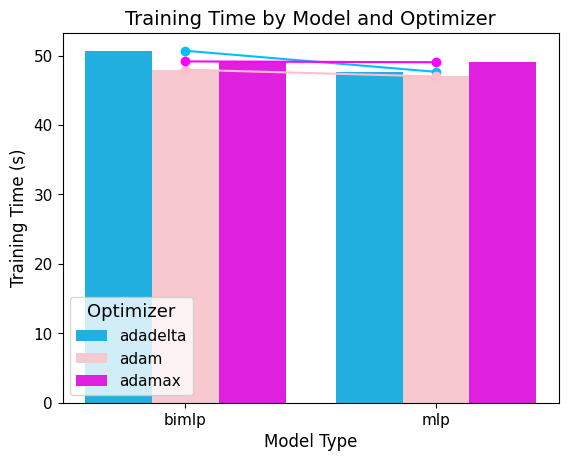

In [11]:

sns.barplot(data=time_df, x='model', y='time', hue='opitmizer', palette=palette)

# Add lines
for optimizer in time_df['opitmizer'].unique():
    subset = time_df[time_df['opitmizer'] == optimizer]
    plt.plot(subset['model'], subset['time'], marker='o', linestyle='-', color=palette[optimizer])

# Add labels and title
plt.xlabel("Model Type", fontsize=12)
plt.ylabel("Training Time (s)", fontsize=12)
plt.title("Training Time by Model and Optimizer", fontsize=14)
plt.legend(title='Optimizer', title_fontsize='13', fontsize='11')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)